In [4]:
import pandas as pd                                   # 数据分析组件
import json                                           # 用于导入工具json
from pyecharts import options as opts                 # 用于调整pyecharts图的属性
from pyecharts.charts import Timeline, Map            # 选取pyecharts基本类型
from pyecharts.globals import ThemeType               # 选取pyecharts主题
import numpy as np                                    # python数值计算工具
tl = Timeline(init_opts=opts.InitOpts(
    theme=ThemeType.INFOGRAPHIC,
    bg_color='white',
    page_title='外商直接投资情况'
))                                                    # 生成timeline图结构
with open("./country_ce.json", 'r', encoding='utf-8') as f:
    ce_dict = json.load(f)                            # 导入国家名称中英文对照表

df = pd.read_csv('./FDI_filled_m.csv')                # 生成dataframe
df.iloc[:, 3] = df.iloc[:, 3].apply(np.log1p)         # 将数值列对数化
for year in range(2003, 2019+1):                      # 循环添加不同年份的数据到timeline图中
    map = (
        Map()                                         # 生成一个年份的地图
        .add(df.columns.tolist()[-1]+"（对数值，原单位：百万美元）",# 设定图层名
            [[ce_dict[row['国家']], row[3]]          # 读入数据，使用dataframe方法进行筛选
                for _, row in df[df.iloc[:, 0] == year].iterrows()],
            maptype="world",                         # 设定为世界地图
            is_map_symbol_show=False,                # 不描点
            )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False)) # 在地图中不显示对应国家的数值
        .set_global_opts(
            title_opts=opts.TitleOpts(title=f"{year}年外商直接投资情况"), #设定当前页的标题
            visualmap_opts=opts.VisualMapOpts(
                max_=df[df.iloc[:, 0] == year].iloc[:, 3].max()),    # 重设图例范围
            toolbox_opts=opts.ToolboxOpts(),                         # 打开工具箱组件，便于后续使用鼠标调节

        )
    )
    tl.add(map, f"{year}年") # 将当前图层加入timeline结构中
tl.render("./out/vis.html") # 生成临时文件

/var/folders/q2/h5gs9x0s7sq113cx9ltqvmvm0000gn/T/ipykernel_1195/1894820973.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [[ce_dict[row['国家']], row[3]]          # 读入数据，使用dataframe方法进行筛选


'/Users/chenxin/Downloads/data/out/vis.html'

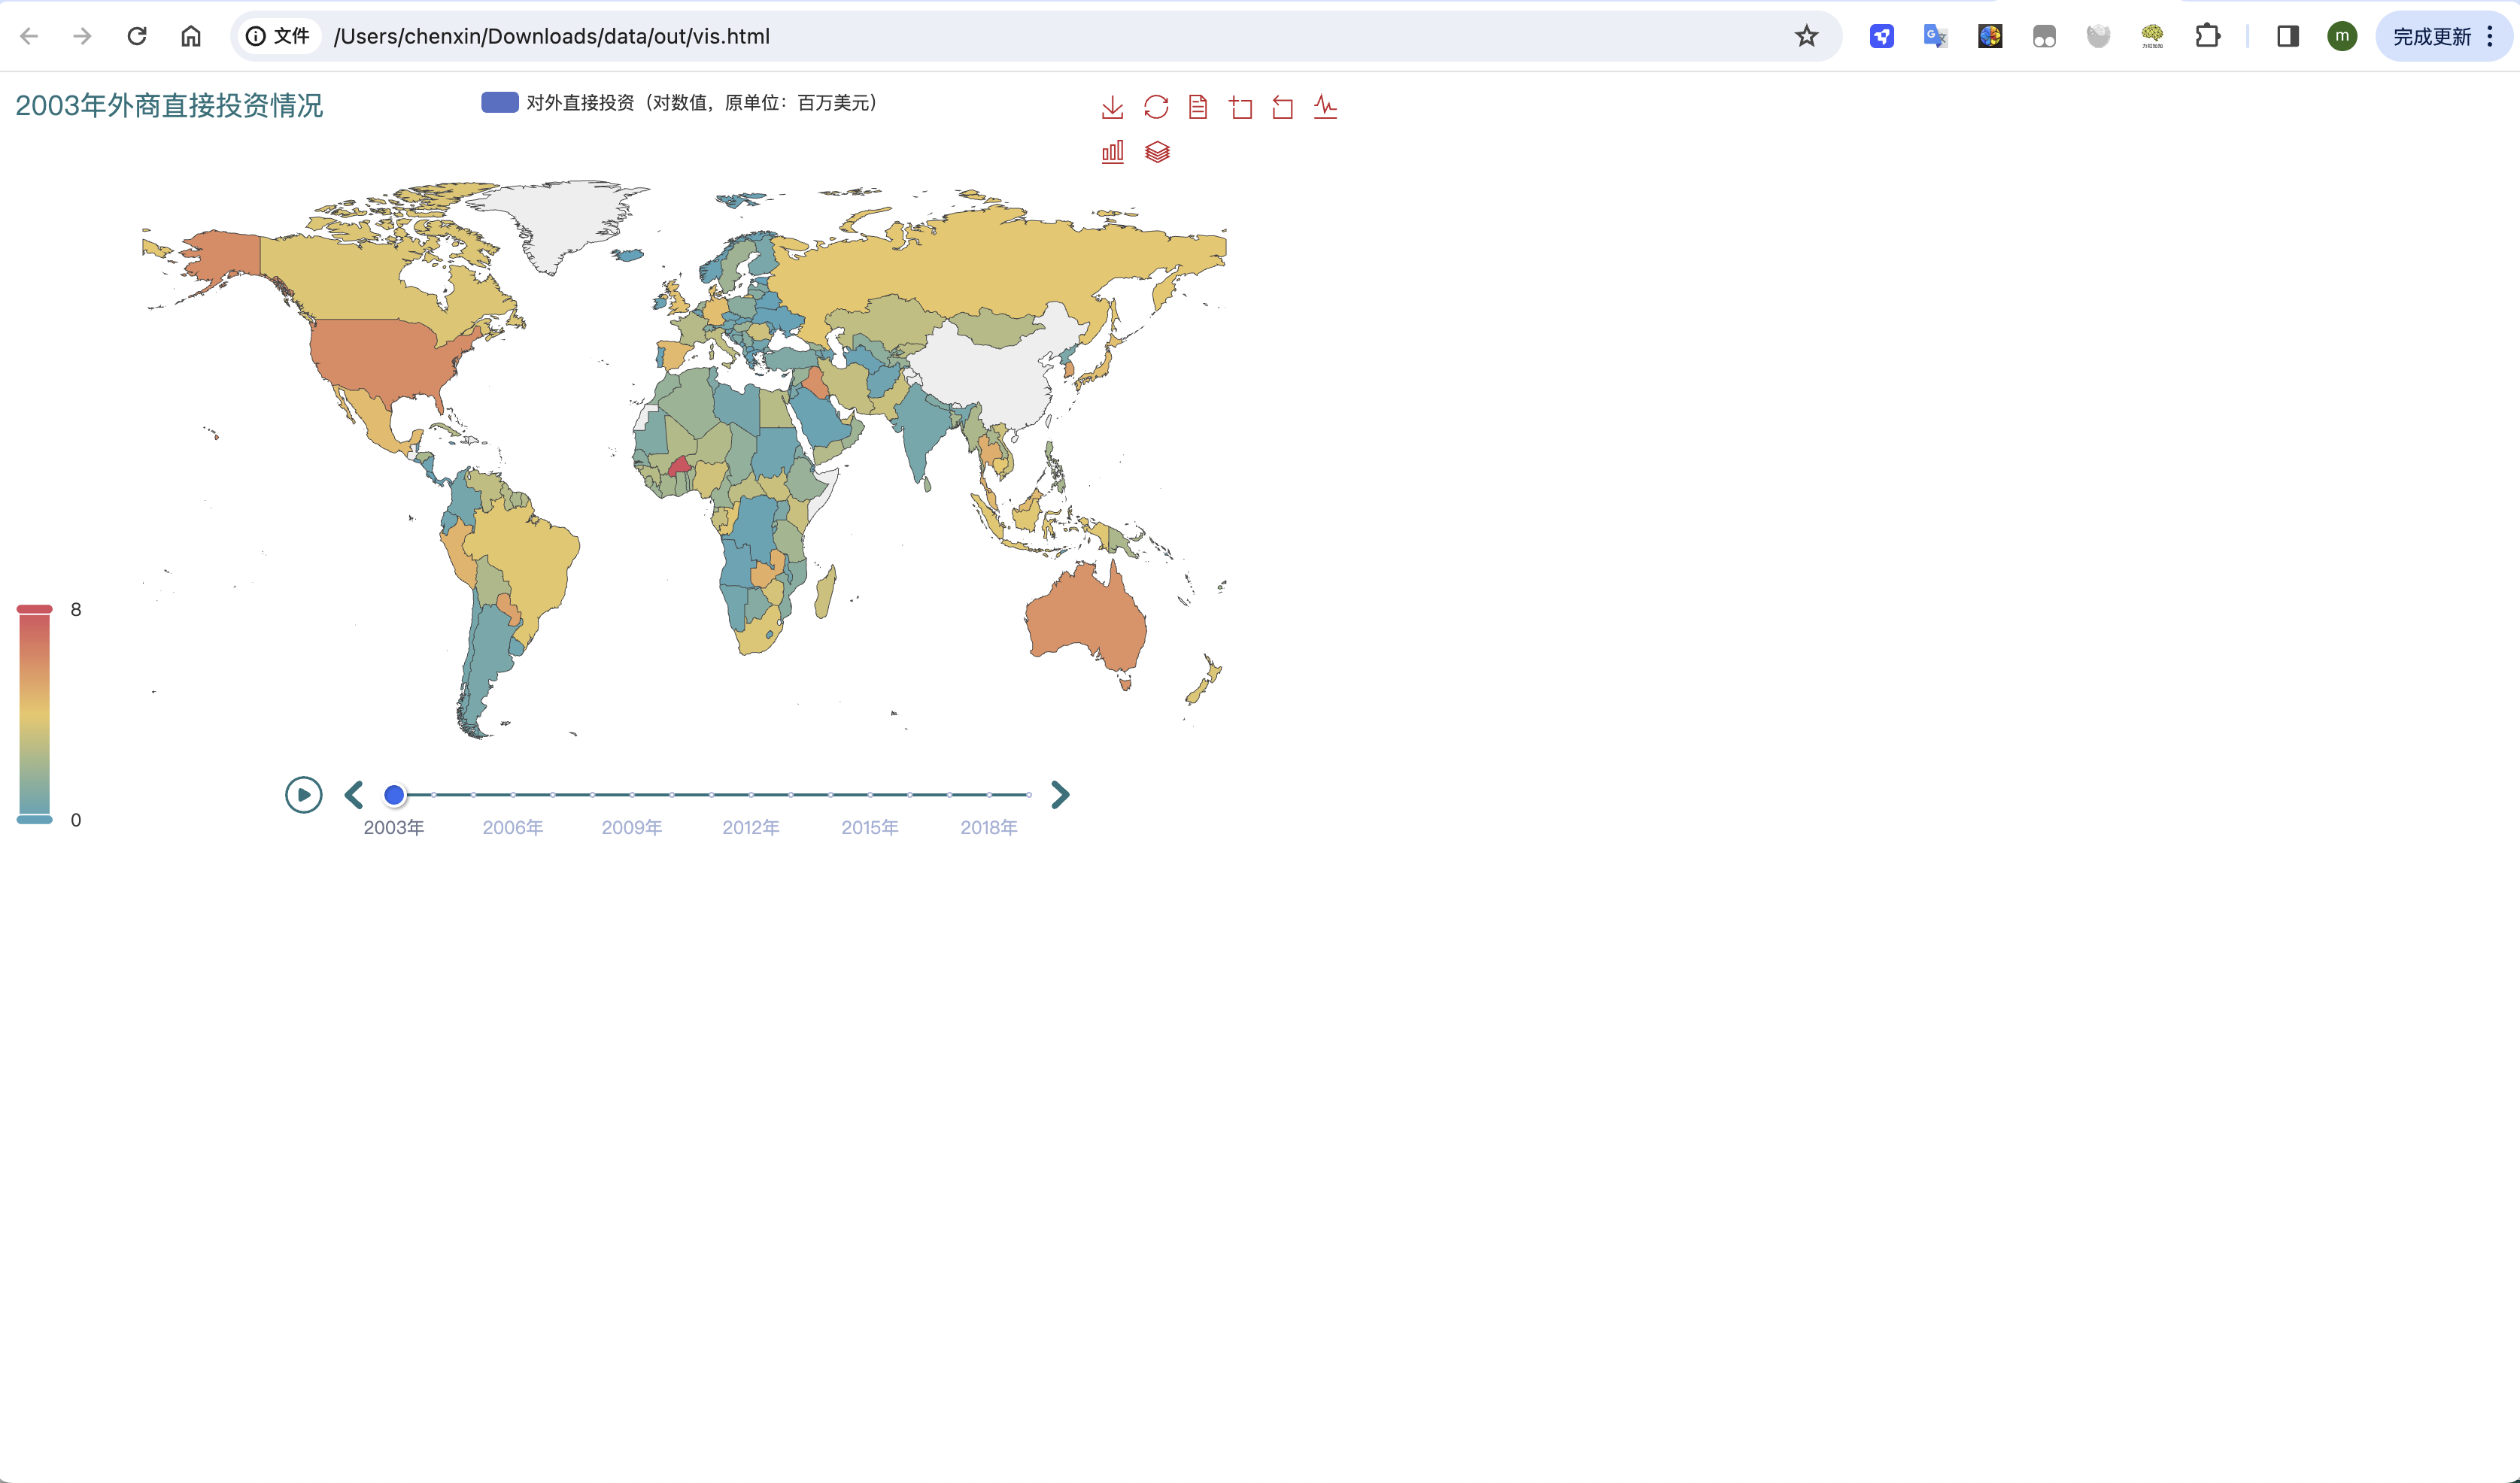

In [2]:
from pyecharts.charts import Bar
import pyecharts.options as opts

# 创建一个Bar对象
bar = Bar()

# 添加数据
bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
bar.add_yaxis("商家A", [5, 20, 36, 10, 75, 90])

# 设置图表标题和样式
bar.set_global_opts(
    title_opts=opts.TitleOpts(title="某商场销售情况"),
    xaxis_opts=opts.AxisOpts(name="商品"),
    yaxis_opts=opts.AxisOpts(name="销量"),
)

# 渲染图表
bar.render("./out/bar_chart.html")


'/Users/chenxin/Downloads/data/out/bar_chart.html'

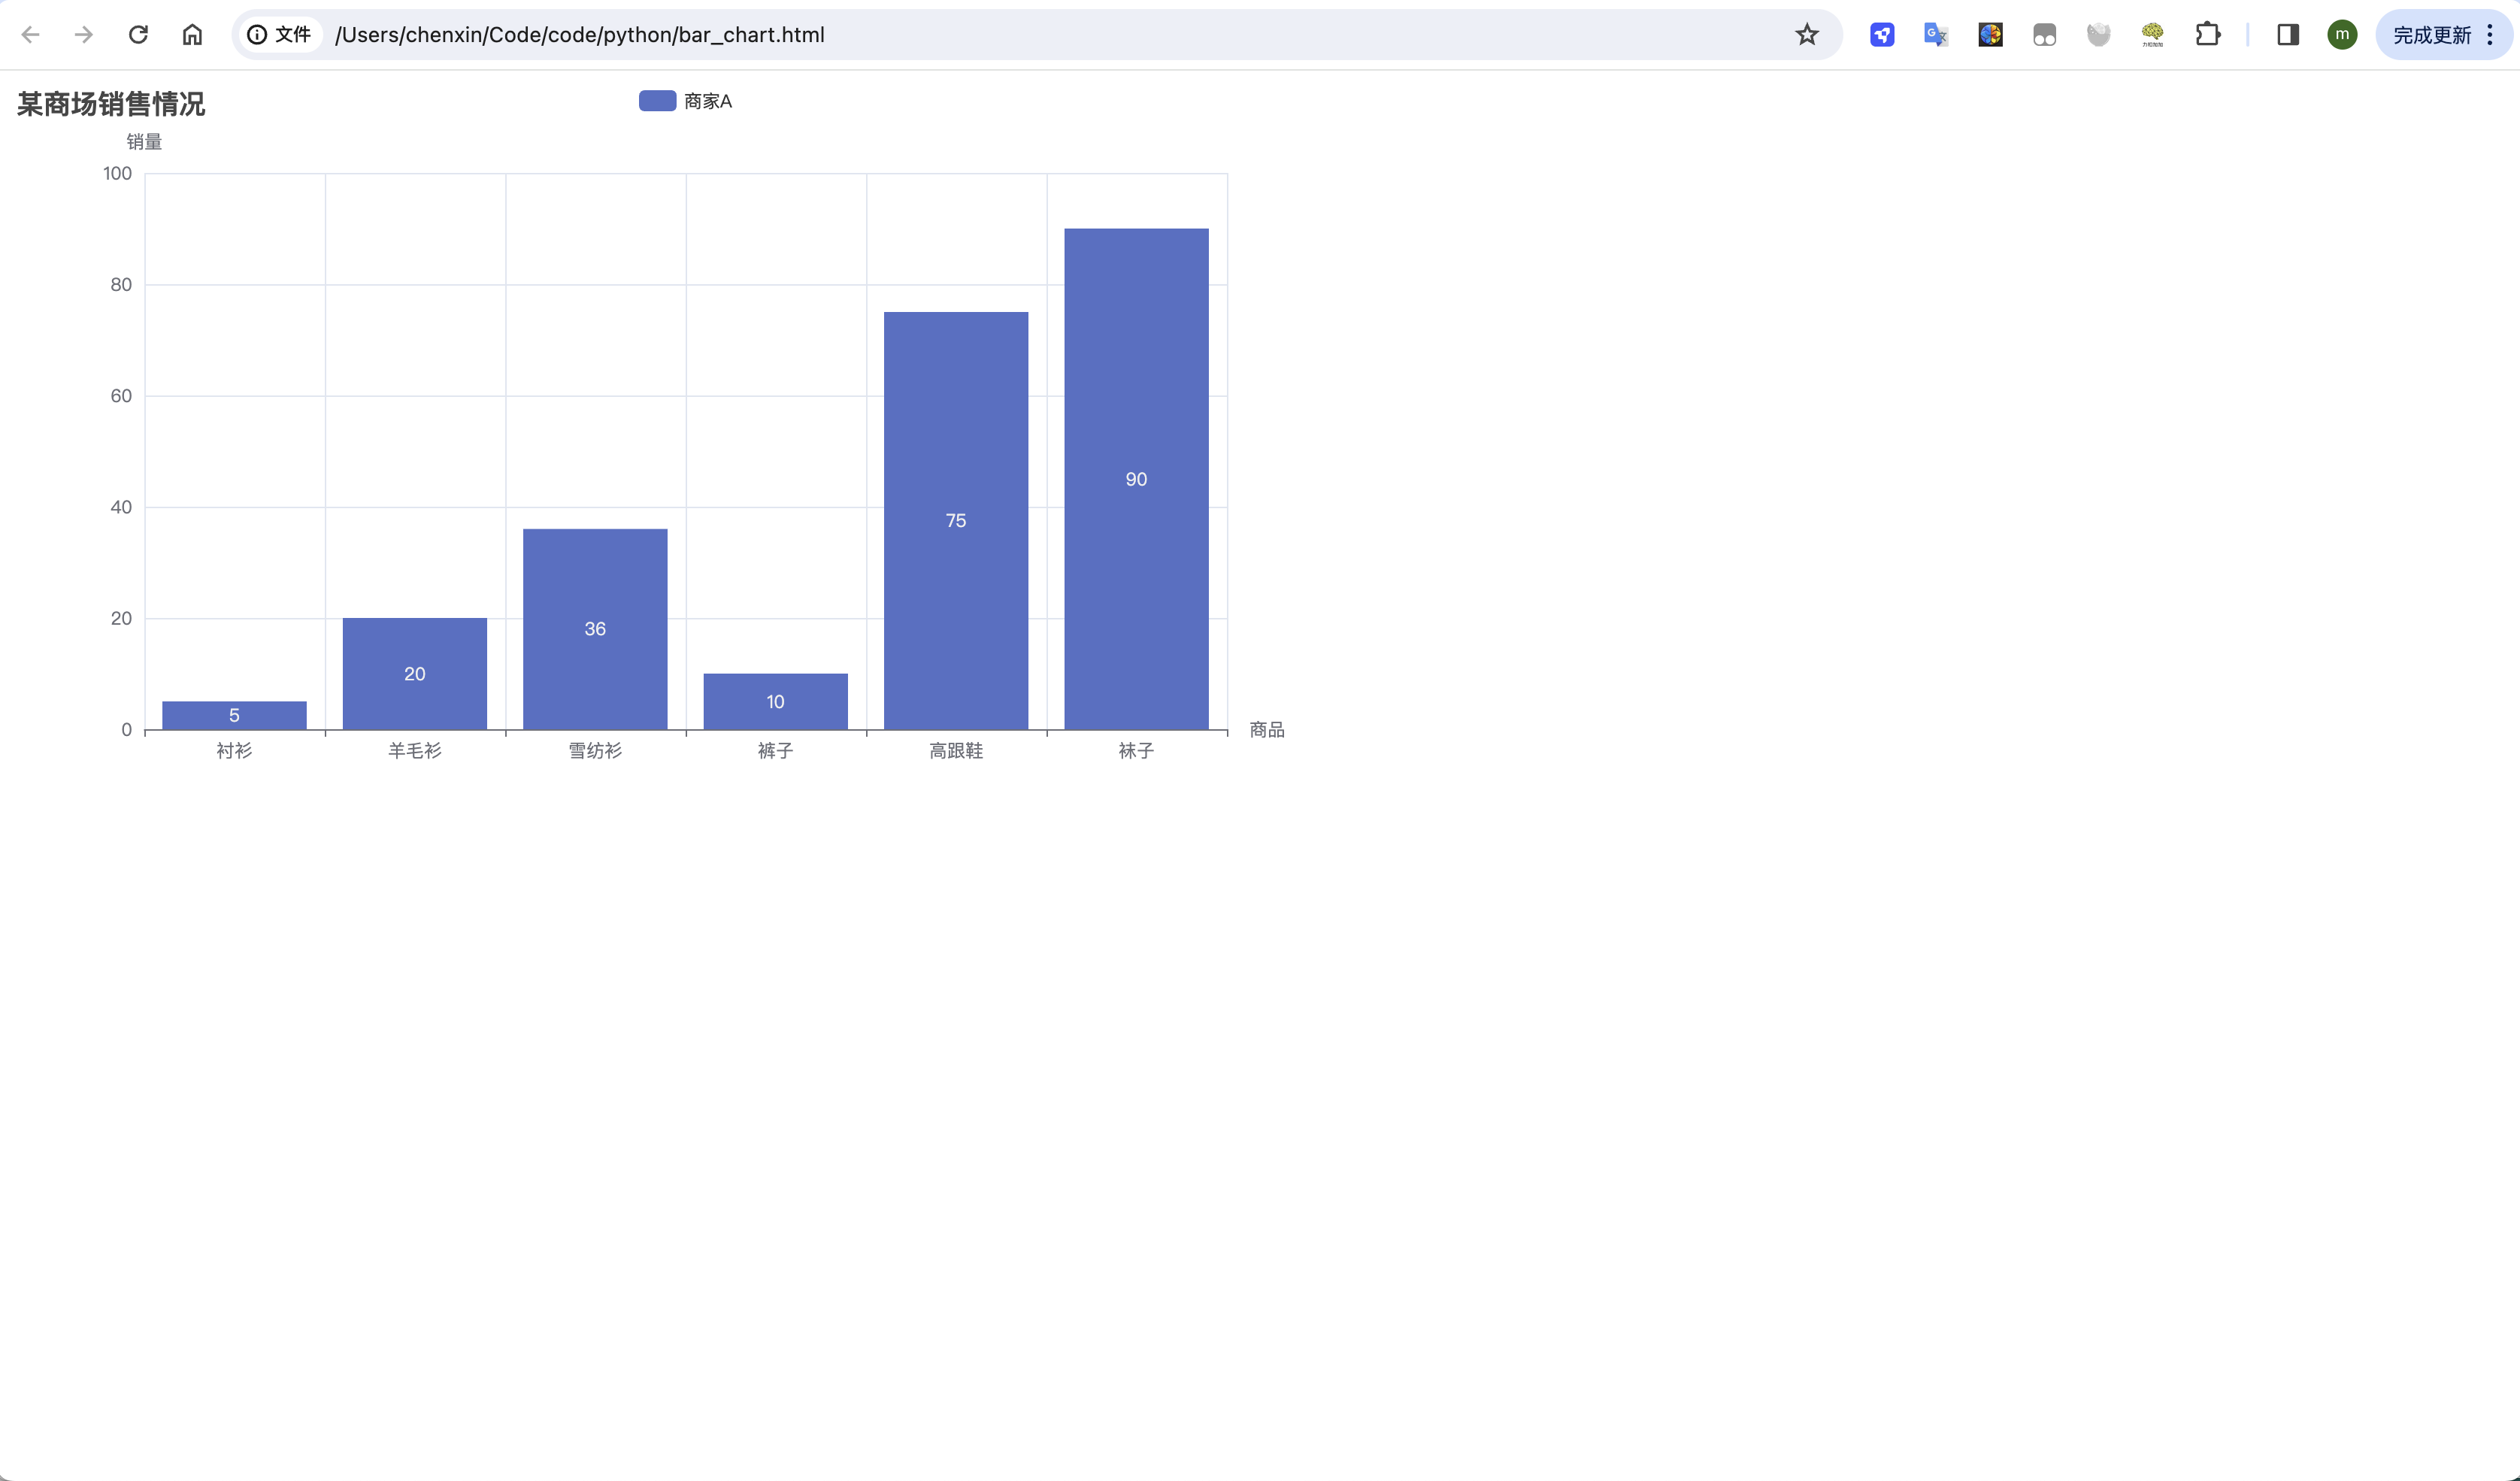